# Кредитный скоринг

In [4]:
# Import library pandas
import pandas as pd

# Import training data as train
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")

# Import testing data as test
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")

In [5]:
# Print top 5 observation of training dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Store total number of observation in training dataset
train_length =len(train)

# Store total number of columns in testing data set
test_col = len(test.columns)

# Understanding Data

In [7]:
# Look at the summary of numerical variables for train data set
df= train.describe()
print (df)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
# Print the unique values and their frequency of variable Property_Area
df1=train['Property_Area'].value_counts()
print (df1)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


# Understanding distribution of numerical variables

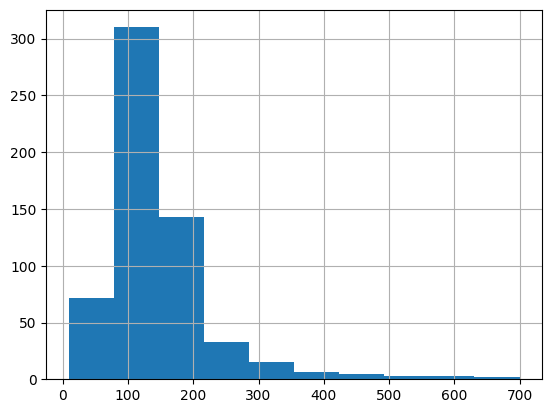

In [9]:
%matplotlib inline
# Plot histogram for variable LoanAmount
train['LoanAmount'].hist()

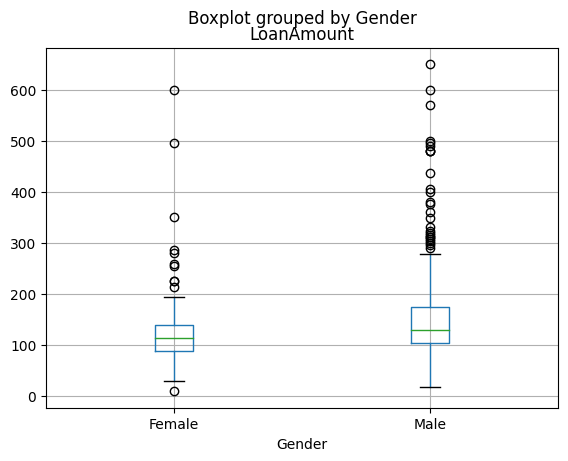

In [10]:
# Plot a box plot for variable LoanAmount by variable Gender of training data set
train.boxplot(column='LoanAmount', by = 'Gender')

# Understanding distribution of categorical variables

In [11]:
# Loan approval rates in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']
print ("%d number of loans were approved." %loan_approval)

422 number of loans were approved.


In [12]:
# Two-way comparison: Credit History and Loan Status
pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [13]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
 return ser/float(ser[-1])

# Two-way comparison: Loan approval rate for customers having Credit_History (1)
df=pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = df['Y'][1]
print ("%f percent of the applicants whose loans were approved have Credit_History equals to 1." %(loan_approval_with_Credit_1*100))

79.578947 percent of the applicants whose loans were approved have Credit_History equals to 1.


In [14]:
df['Y']

# Dealing with missing values

In [15]:
# Number of variables with missing values
variables_missing_value = train.isnull().sum()
variables_missing_value 

In [16]:
# Impute missing value of Loan_Amount_Term with median
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

In [17]:
# Impute missing value of Self_Employed with more frequent category
train['Self_Employed'].fillna('No',inplace=True)

# Treat Outliers of LoanAmount and Applicant Income

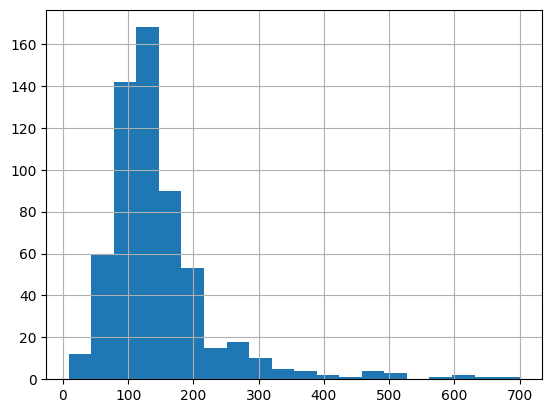

In [18]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
train['LoanAmount'].hist(bins=20)

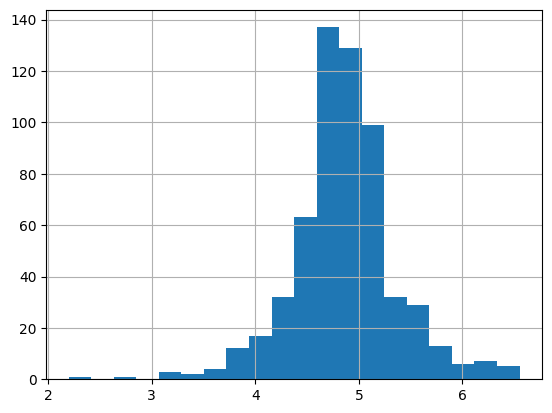

In [19]:
import numpy as np
# Perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log'] = np.log(train['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
train['LoanAmount_log'].hist(bins=20)

# Data Preparation for Model Building

In [20]:
from sklearn import preprocessing

# Impute missing values for Gender
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat_col=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in cat_col:
    le = preprocessing.LabelEncoder()
    train[var]=le.fit_transform(train[var].astype('str'))

In [21]:
train['Credit_History'].isnull().sum()

0

In [22]:
LoanAmount_have_missing_value = train['LoanAmount'].isnull().sum() > 0

In [23]:
LoanAmount_have_missing_value

True

In [24]:
train.isnull().sum()

In [25]:
train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,614.000000,614.000000,614.000000,592.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,7024.705081,4.857444
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.352339,0.787482,6458.663872,0.505142
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,2.197225
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,4166.000000,4.605170
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,5416.500000,4.852030
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000,2.000000,7521.750000,5.123964
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,6.551080


In [26]:
# Impute missing value of LoanAmount with 168
train['LoanAmount'].fillna(168, inplace=True)

# Impute missing value of LoanAmount with median
#train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [27]:
train['LoanAmount'].median()

129.0

In [28]:
train['Gender'].fillna('Male',inplace=True)

In [29]:
train['Credit_History'].value_counts()

In [30]:
train['Credit_History'].fillna(1,inplace=True)


In [31]:

from sklearn.preprocessing import LabelEncoder

In [32]:
number = LabelEncoder()

In [33]:
train['Married_new'] = number.fit_transform(train['Married'].astype(str))

In [34]:
import sklearn.linear_model

# Create object of Logistic Regression
model=sklearn.linear_model.LogisticRegression()

In [35]:
predictors =['Credit_History','Education','Gender']

In [36]:
train['Credit_History'] = number.fit_transform(train['Credit_History'])

train['Education'] = number.fit_transform(train['Education'])

train['Gender'] = number.fit_transform(train['Gender'])
train['Loan_Status'] = number.fit_transform(train['Loan_Status'])

In [37]:
test['Credit_History'] = number.fit_transform(test['Credit_History'])

test['Education'] = number.fit_transform(test['Education'])

test['Gender'] = number.fit_transform(test['Gender'])

In [38]:
x_train = train[predictors].values
y_train = train['Loan_Status'].values

In [39]:
model.fit(x_train, y_train)

LogisticRegression()

In [40]:
x_test = test[predictors].values

In [41]:
predicted = model.predict(x_test)
predicted = number.inverse_transform(predicted)
test['Loan_Status']=predicted

In [42]:
import sklearn.tree
model = sklearn.tree.DecisionTreeClassifier()

In [43]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
x_test = test[predictors].values

In [45]:
predicted= model.predict(x_test)
predicted = number.inverse_transform(predicted)
test['Loan_Status_tree']=predicted

In [46]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)

print (featimp)

Credit_History    0.987123
Education         0.007222
Gender            0.005655
dtype: float64
